# 1. Import the required libraries and read the dataset.

In [122]:
# importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [123]:
# Reading the csv file 

df = pd.read_csv('fifa.csv')


# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [124]:
# Checking first few samples

df.head(5)


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [125]:
# Checking shape of the dataset

df.shape

(18207, 60)

In [126]:
# Checking the dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

# 3. Drop the columns which you think redundant for the analysis.
 [Hint: columns like 'Photo','Flag','Club Logo']

In [127]:
# Dropping the redundant columns
df.drop(['Photo', 'Flag', 'Club Logo'], axis=1, inplace=True)


In [128]:
# Viewing data after dropping columns
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# 4. Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix. (6 points)
- Note: When the record/entry has "M"(indicates millions) as suffix you need to multiply that value with 1000000
- When the record/entry has "K"(indicates thousands) as suffix you need to multiply that value with 1000

In [129]:
# defining a function to convert the value with suffix K/M appropriately
def convert_value(value):
    
        if 'K' in value:
            return float(value[:-1]) * 1000
        elif 'M' in value:
            return float(value[:-1]) * 1000000
        else:
            return value


# Replacing the '€' symbols in the data
cols_to_process = ['Value','Wage','Release Clause']
for col in cols_to_process:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace('€','')
    
# Converting the values of each column and the respective datatype to float 
for col in cols_to_process:
    df[col] = df[col].apply(convert_value)
    df[col] = df[col].astype(float)
    print(df[col].dtype)     # printing column datatype after converting to float type




float64
float64
float64


In [130]:
# Checking datatype of columns 'Value', Wage' & 'Release Clause' as conversion to float datatype

df[cols_to_process].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Value           18207 non-null  float64
 1   Wage            18207 non-null  float64
 2   Release Clause  16643 non-null  float64
dtypes: float64(3)
memory usage: 426.9 KB


In [131]:
# Checking columns 'Value', Wage' & 'Release Clause' after removal of prefix '€' and K/M suffix 

df[cols_to_process].head(10)

,Value,Wage,Release Clause
0,110500000.0,565000.0,226500000.0
1,77000000.0,405000.0,127100000.0
2,118500000.0,290000.0,228100000.0
3,72000000.0,260000.0,138600000.0
4,102000000.0,355000.0,196400000.0
5,93000000.0,340000.0,172100000.0
6,67000000.0,420000.0,137400000.0
7,80000000.0,455000.0,164000000.0
8,51000000.0,380000.0,104600000.0
9,68000000.0,94000.0,144500000.0


# 5. Convert the column "Joined" into integer data type with keeping only the year. (2 points)

In [132]:
df['Joined'] = df['Joined'].str.split(',', expand=True)[1].str.strip()
df['Joined'] = pd.to_numeric(df['Joined'], errors='coerce').fillna(0).astype(int)

# Checking the 'Joined' datatype after conversion to 'int32'
df['Joined'].dtype

dtype('int32')

In [133]:
# Checking sample 'Joined' column to only year format (yyyy)

df[['Name','Club','Joined']].sample(5)

,Name,Club,Joined
1912,Brais Méndez,RC Celta,2015
3134,A. Ricaurte,Independiente Medellín,2017
12988,A. Ferati,Hamburger SV,2016
1741,J. Damm,Tigres U.A.N.L.,2015
5238,Momo,UD Las Palmas,2012


# 6. Convert the column "Contract Valid Until" to pandas datetime type. (2 points)

In [134]:
# Imputing the column with only year (yyyy) information with 'Jan 01, yyyy'

df['Contract Valid Until'] = df['Contract Valid Until'].astype(str)
only_yyyy = df['Contract Valid Until'].str.match(r'^\d{4}$')
df.loc[only_yyyy, 'Contract Valid Until'] = 'Jan 1, ' + df.loc[only_yyyy,'Contract Valid Until']

# Converting the datatype to datetime datatype
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'], format='%b %d, %Y', errors='coerce')

df['Contract Valid Until'].sample(5)


3702    2022-01-01
10608   2020-01-01
7169    2020-01-01
11224   2019-01-01
16028   2021-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

In [135]:
# Printing the datatype after conversion 

print( "Datatype after conversion => ", df['Contract Valid Until'].dtype )


Datatype after conversion =>  datetime64[ns]


# 7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points. (2 points)


In [136]:
df['Height'] = df['Height'].str.replace("\'",".")
df['Height'] = df['Height'].astype(float)

# Printing datatpe of 'Height' column after conversion to float
df['Height'].dtype

dtype('float64')

In [137]:
# Printing sample data of Height column after conversion to 'float' dtype
df[['Name','Height']].sample(5)

,Name,Height
10817,C. Long,5.11
16850,D. Ingham,6.10
9872,K. Kamiński,6.30
10690,J. Reinhardt,6.00
7573,A. Jovanović,6.40


# 8. The column "Weight" has the suffix as lbs, remove the suffix and convert to float. (2 points)

In [138]:
df['Weight'] = pd.to_numeric(df['Weight'].str.replace('lbs',''))

# Printing datatpe of 'Height' column after conversion to float
df['Weight'].dtype

dtype('float64')

In [139]:
# Printing sample data of Weight column after conversion to 'float' dtype
df[['Name','Weight']].sample(5)

,Name,Weight
13883,M. Lode,170.0
10070,M. Devlin,174.0
11645,R. Meléndez,159.0
3498,Claiton,174.0
16094,P. Magnon,152.0


# 9. Check for the percentage of missing values and impute them with appropriate imputation techniques. (4 points)



In [140]:
# Calculating the missing value % for each column

(df.isna().sum()/len(df)*100).round(2).astype(str) + ' %'

ID                            0.0 %
Name                          0.0 %
Age                           0.0 %
Nationality                   0.0 %
Overall                       0.0 %
Potential                     0.0 %
Club                         1.32 %
Value                         0.0 %
Wage                          0.0 %
Preferred Foot               0.26 %
International Reputation     0.26 %
Weak Foot                    0.26 %
Skill Moves                  0.26 %
Work Rate                    0.26 %
Body Type                    0.26 %
Position                     0.33 %
Jersey Number                0.33 %
Joined                        0.0 %
Loaned From                 93.06 %
Contract Valid Until         1.59 %
Height                       0.26 %
Weight                       0.26 %
Crossing                     0.26 %
Finishing                    0.26 %
HeadingAccuracy              0.26 %
ShortPassing                 0.26 %
Volleys                      0.26 %
Dribbling                   

In [141]:
# Imputation technique for columns with very low 'Non-Available' data less than 0.5%
# Columns with higher % of Non-Available data left out so that data remains unvaries
cols_to_process = ['Preferred Foot','International Reputation','Weak Foot','Skill Moves','Work Rate','Body Type','Position','Jersey Number','Height','Weight'
,'Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed'
,'Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking'
,'StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']

for col in cols_to_process:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [142]:
# After imputation of Non-available data

(df.isnull().sum()/len(df)*100).round(2).astype(str) + " %"

ID                            0.0 %
Name                          0.0 %
Age                           0.0 %
Nationality                   0.0 %
Overall                       0.0 %
Potential                     0.0 %
Club                         1.32 %
Value                         0.0 %
Wage                          0.0 %
Preferred Foot                0.0 %
International Reputation      0.0 %
Weak Foot                     0.0 %
Skill Moves                   0.0 %
Work Rate                     0.0 %
Body Type                     0.0 %
Position                      0.0 %
Jersey Number                 0.0 %
Joined                        0.0 %
Loaned From                 93.06 %
Contract Valid Until         1.59 %
Height                        0.0 %
Weight                        0.0 %
Crossing                      0.0 %
Finishing                     0.0 %
HeadingAccuracy               0.0 %
ShortPassing                  0.0 %
Volleys                       0.0 %
Dribbling                   

# 10. Plot the distribution of Overall rating for all the players and write your findings. (2 points)


Text(0.5, 1.0, 'Distribution of Players Overall Ratings')

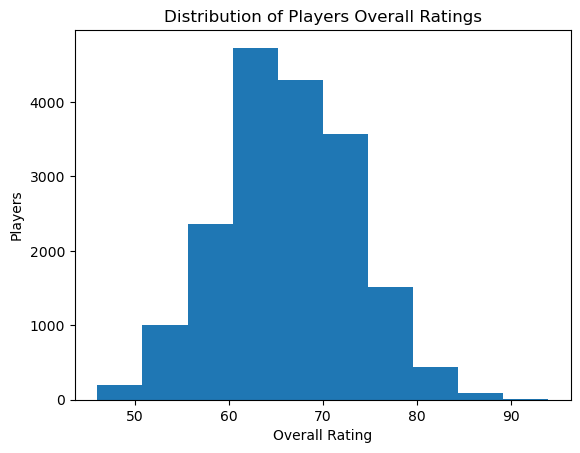

In [143]:

plt.hist(df['Overall'])
plt.xlabel('Overall Rating')
plt.ylabel('Players')
plt.title('Distribution of Players Overall Ratings')

# Comments :: Most of the players are rated within the range of 65-75%

# 11. Retrieve the names of top20 players based on the Overall rating. (2 points)

In [144]:
df[['Name','Overall']].sort_values(by='Overall', ascending=False).head(20).reset_index()

,index,Name,Overall
0,0,L. Messi,94
1,1,Cristiano Ronaldo,94
2,2,Neymar Jr,92
3,3,De Gea,91
4,4,K. De Bruyne,91
5,5,E. Hazard,91
6,6,L. Modrić,91
7,7,L. Suárez,91
8,8,Sergio Ramos,91
9,12,D. Godín,90


# 12. Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating. (4 points)

In [145]:
df.sort_values(by='Overall', ascending=False).head(20).reset_index()

,index,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
9,12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0


# 13. What is the average "Age" and "Wage" of these top 20 players? (use the data frame created in the question 11) (2 points)


In [146]:
df_top_20 = df.sort_values(by='Overall', ascending=False).head(20)
print("Average Age of Top 20 Players is => " , df_top_20['Age'].mean())
print("Average Wage of Top 20 Players is => ", df_top_20['Wage'].mean())

Average Age of Top 20 Players is =>  29.55
Average Wage of Top 20 Players is =>  294950.0


# 14. Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage. (2 points)

In [147]:
df_top_20[['Name','Wage']].sort_values(by='Wage', ascending=False).head(1)

,Name,Wage
0,L. Messi,565000.0


# 15. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'. (4 Points)
- i) find the average Overall rating for each club.
- ii) Display the average overall rating of Top10 Clubs using a plot


In [148]:
# Generating the dataframe

df1 = df[['Name', 'Club', 'Wage','Overall']]
df1.head()

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
1,Cristiano Ronaldo,Juventus,405000.0,94
2,Neymar Jr,Paris Saint-Germain,290000.0,92
3,De Gea,Manchester United,260000.0,91
4,K. De Bruyne,Manchester City,355000.0,91


In [149]:
# finding the average Overall rating for each club

df1.groupby(['Club'])[['Overall']].mean()

,Overall
Club,
SSV Jahn Regensburg,65.586207
1. FC Heidenheim 1846,65.750000
1. FC Kaiserslautern,63.384615
1. FC Köln,70.785714
1. FC Magdeburg,65.615385
...,...
Zagłębie Sosnowiec,60.760000
Çaykur Rizespor,66.900000
Örebro SK,60.481481


In [150]:
# Displaying the average overall rating of Top10 Clubs using a plot

df_top_10 = df.groupby('Club')[['Overall']].mean().sort_values(by=['Overall'], ascending=False).head(10)
df_top_10

,Overall
Club,
Juventus,82.280000
Napoli,80.000000
Inter,79.750000
Real Madrid,78.242424
Milan,78.074074
FC Barcelona,78.030303
Paris Saint-Germain,77.433333
Roma,77.423077
Manchester United,77.242424


<Axes: xlabel='Club', ylabel='Average Rating'>

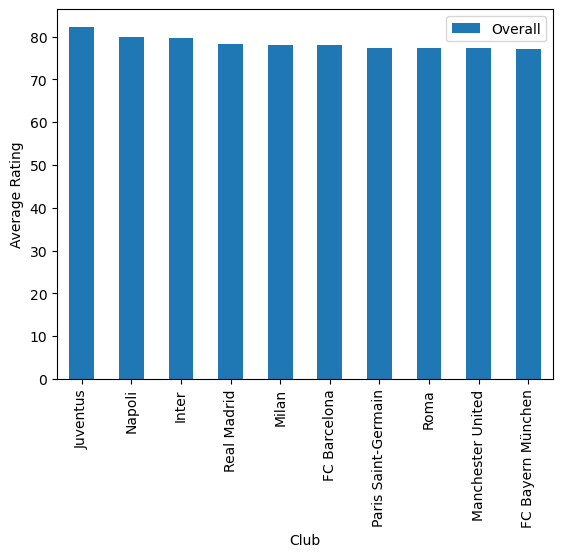

In [151]:
# sns.barplot(data=df_top_10)
df_top_10.plot(kind='bar', xlabel="Club", ylabel="Average Rating")

# 16. What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same. (2 points)

In [152]:
# Displaying the correlation between Age & Potential
corr_df = df[['Age','Potential']].corr()
corr_df              

,Age,Potential
Age,1.000000,-0.253312
Potential,-0.253312,1.000000


<Axes: >

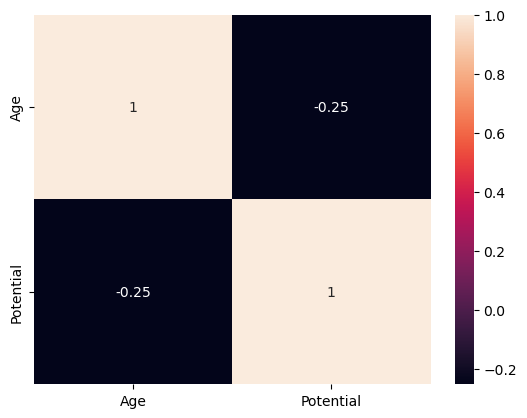

In [153]:
sns.heatmap(corr_df, annot=True)

# Comments:: The Age & Potential plotted on heatmap shows mild -ve correlation that depicts
#            potential of players to be dropping with growing age.

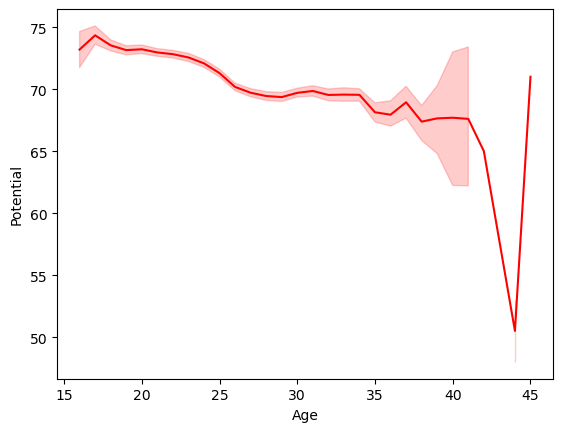

In [154]:

sns.lineplot(x= 'Age', y= 'Potential', data = df, color='red')
plt.show()

#Comments:: Potential of players shows to be declining with increase of age on an average.
#           And shows peak potential around the age of 15-20

# 17. Which features directly contribute to the wages of the players? Support your answer with a plot and a metric. (2 points) (hint: use potential, Overall, value, international reputation, and Release Clause)

<function matplotlib.pyplot.show(close=None, block=None)>

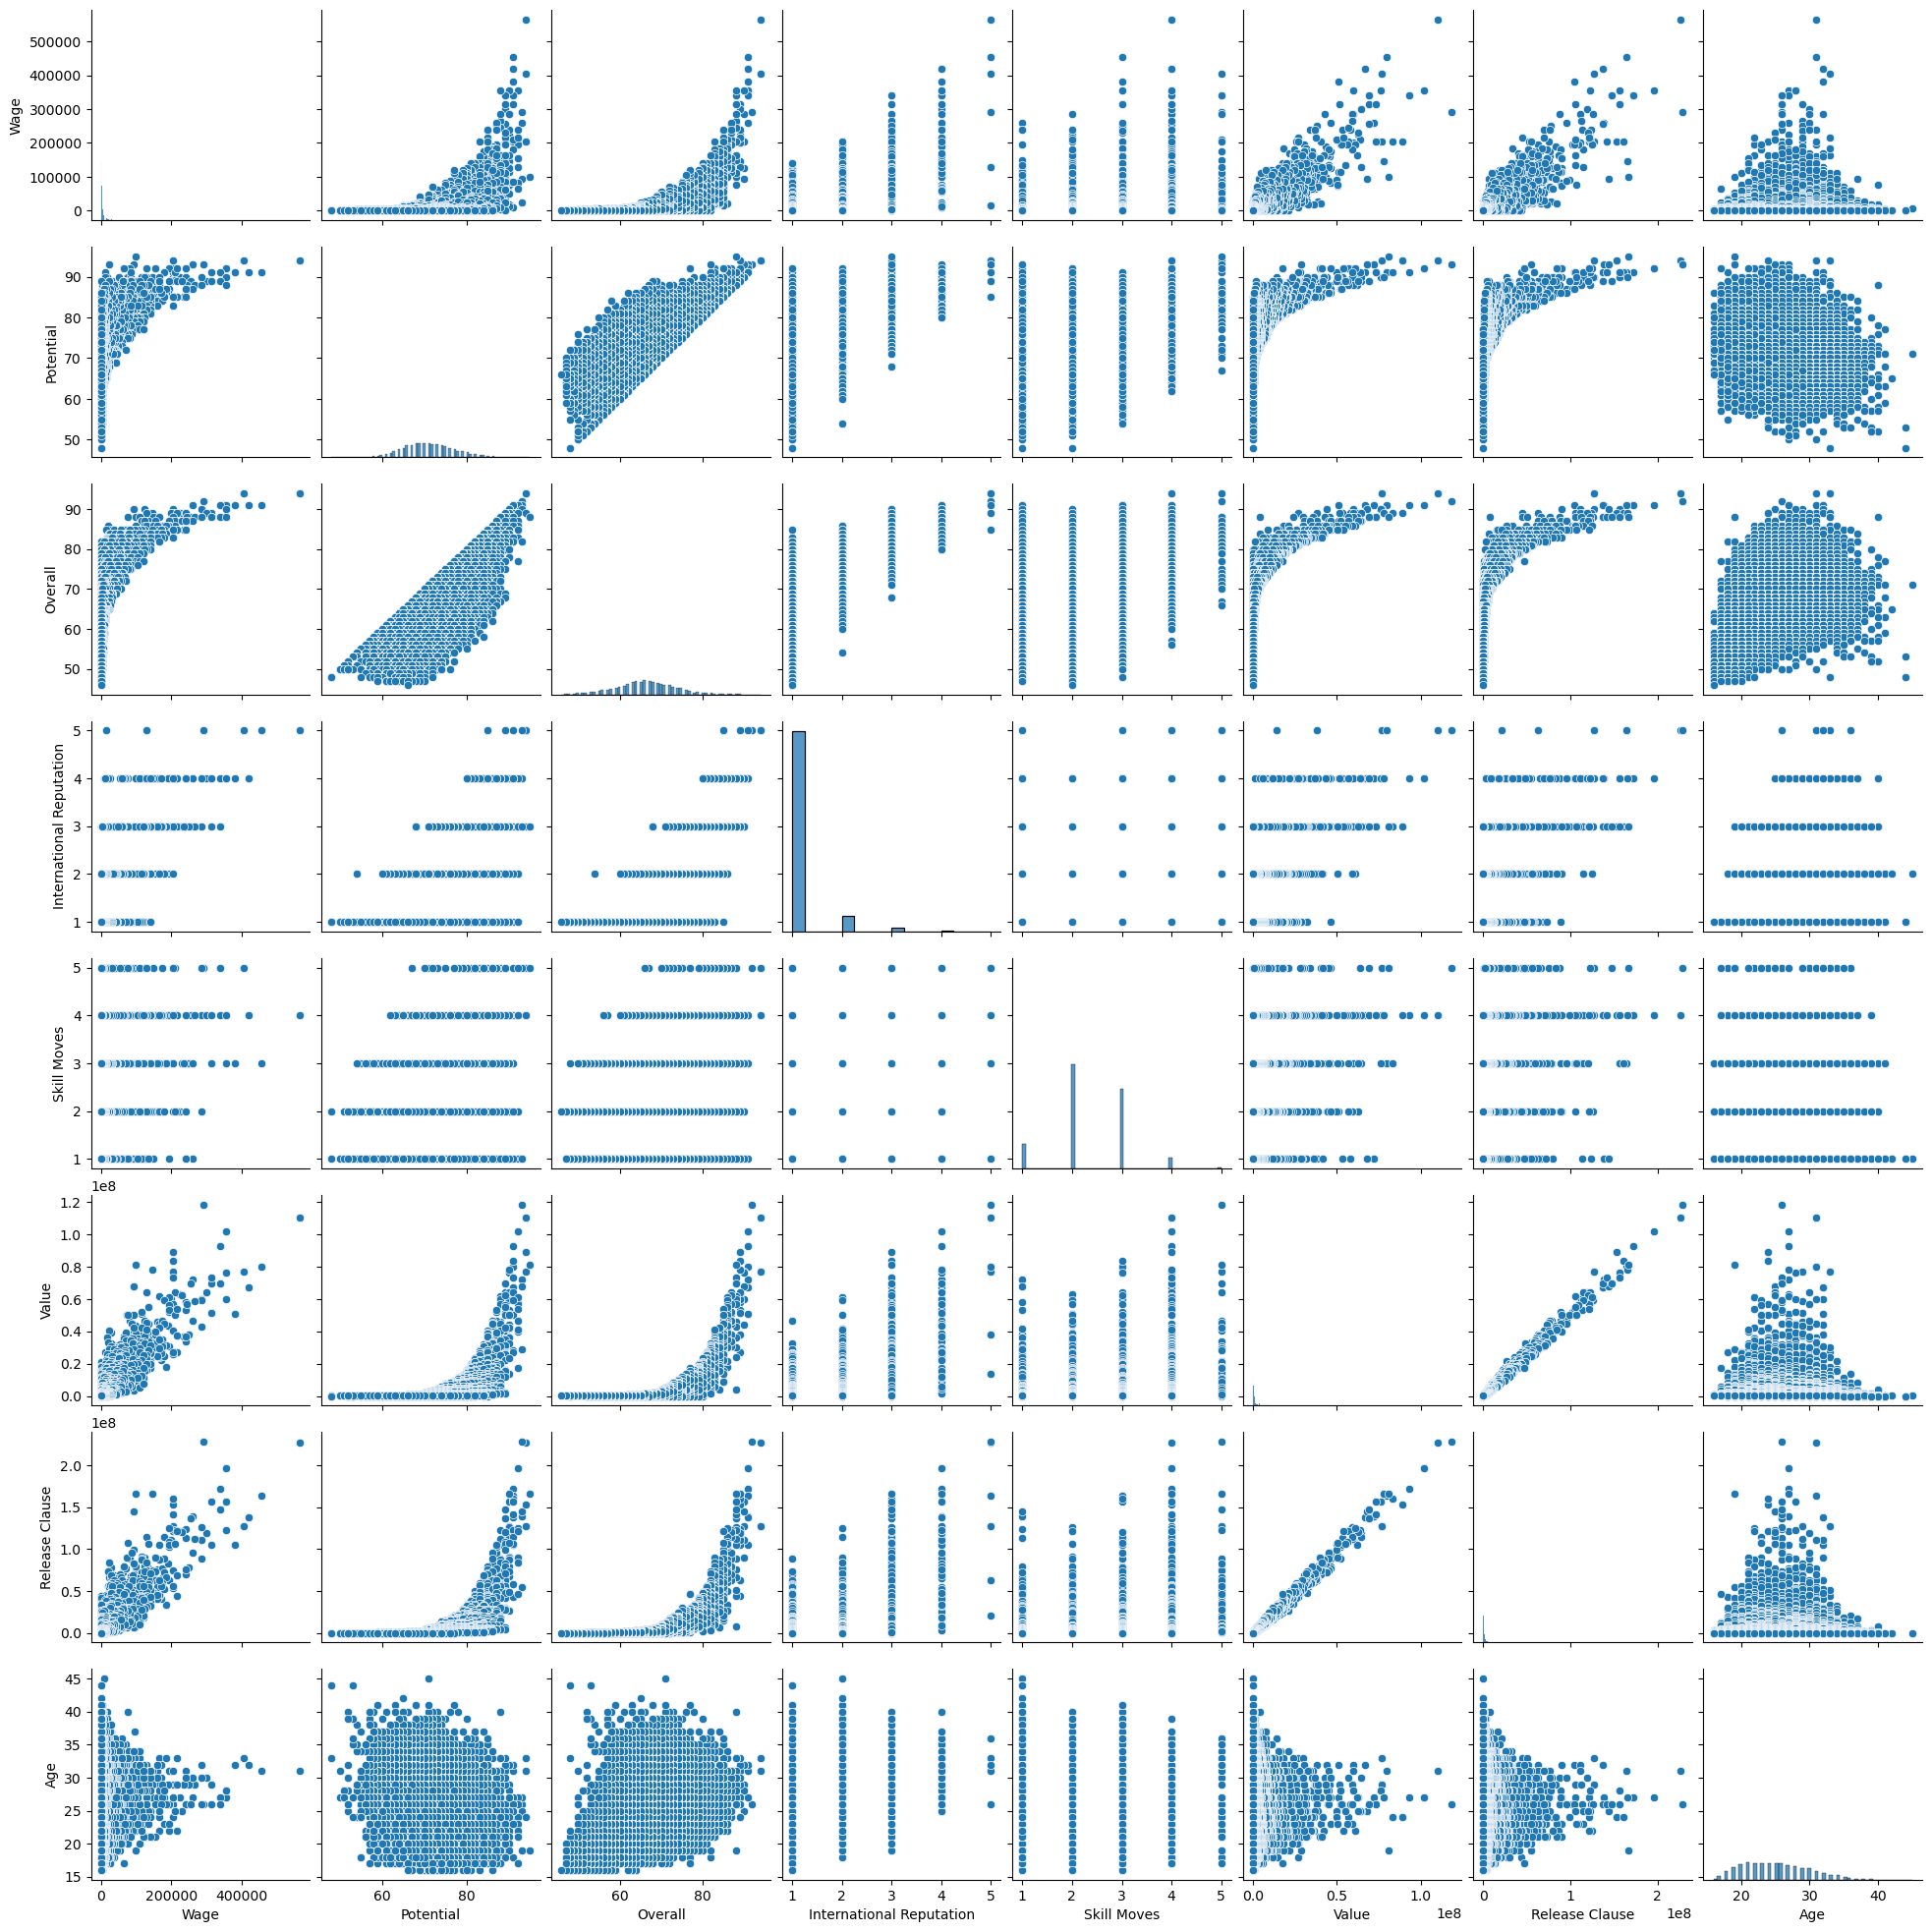

In [155]:
pair_df = df[['Wage','Potential','Overall','International Reputation','Skill Moves','Work Rate','Value','Release Clause','Age']]

sns.pairplot(pair_df)
plt.show

# 18. Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot. (2 points)

In [156]:
# Position of Max Players 
print("Position at which maximum players play =>" )
print(df['Position'].value_counts().head(1))   



Position at which maximum players play =>
Position
ST    2212
Name: count, dtype: int64


In [157]:
# Position of Minimum Players 
print("Position at which minimum players play =>")
df['Position'].value_counts().tail(1)

Position at which minimum players play =>


Position
LF    15
Name: count, dtype: int64

# 19. How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players. (2 points)


In [159]:

Juv200K_df = df[ (df['Club']=='Juventus') & (df['Wage'] > 200000) ]
print("No. of Players playing for Juventus & Wage greater than 200K is : ", len(Juv200K_df))
Juv200K_df

No. of Players playing for Juventus & Wage greater than 200K is :  3


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


# 20. Generate a data frame containing top 5 players by Overall rating for each unique position. (2 Points)


In [160]:
# Get count of unique positions in the dataset
distinct_positions = df['Position'].nunique()
print('Count of distinct positions: ',distinct_positions)
print('Data Frame row count: ',distinct_positions * 5)
sorted_df = df.sort_values(by = 'Overall', ascending = False).groupby('Position').head(5)
sorted_df = sorted_df.sort_values(by = ['Position','Overall'], ascending = [True,False]).reset_index(drop=True)
sorted_df[['Position','Name','Overall']]

Count of distinct positions:  27
Data Frame row count:  135


,Position,Name,Overall
0,CAM,A. Griezmann,89
1,CAM,C. Eriksen,88
2,CAM,M. Özil,86
3,CAM,T. Müller,86
4,CAM,Roberto Firmino,86
...,...,...,...
130,ST,Cristiano Ronaldo,94
131,ST,R. Lewandowski,90
132,ST,S. Agüero,89
133,ST,H. Kane,89


# 21. What is the average wage one can expect to pay for the top 5 players in every position? (use the data frame created in Q19) (2 points)

In [161]:
sorted_df.groupby(['Position'])[['Wage']].mean()

,Wage
Position,
CAM,174000.0
CB,124800.0
CDM,199200.0
CF,47400.0
CM,130600.0
GK,192800.0
LAM,81600.0
LB,177200.0
LCB,162000.0
